In [122]:
from math import tan, radians, cos, sin, degrees, ceil
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

V = 10
TARGET_X = 10
TARGET_Y = 1
INITIAL_Y = 1
LOWER_BOUND = -90
UPPER_BOUND = 90
G = 9.8

In [ ]:
def plot_grad_history(history, loss_fn, resolution=0.1):
    """
    history   : list of the thetas visited (in radians)
    loss_fn   : callable theta_rad -> loss
    resolution: step in degrees for drawing the background loss curve
    """
    # 1) trajectory in radians → degrees for plotting
    hist_deg = np.degrees(history)
    hist_loss = [loss_fn(theta) for theta in history]

    # 2) a fine grid from -90° to +90° to draw the true loss function
    grid_deg = np.arange(-90, 90 + resolution, resolution)
    grid_rad = np.radians(grid_deg)
    grid_loss = [loss_fn(theta) for theta in grid_rad]

    plt.figure(figsize=(8,5))
    plt.plot(hist_deg,   hist_loss, label='GD trajectory', marker='o')
    plt.plot(grid_deg,   grid_loss, linestyle='--', label='Loss surface')
    plt.ylim(0, 1)
    plt.xlim(  -90,  90) 
    plt.xlabel('Angle (degrees)')
    plt.ylabel('Loss')
    plt.title('Loss vs Angle')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_loss_function(loss_fn, resolution=0.1):
	"""
	loss_fn   : callable theta_rad -> loss
	resolution: step in degrees for drawing the background loss curve
	"""

	grid_deg = np.arange(-90, 90 + resolution, resolution)
	grid_rad = np.radians(grid_deg)
	grid_loss = [loss_fn(theta) for theta in grid_rad]

	plt.figure(figsize=(8,5))
	plt.plot(grid_deg,   grid_loss, linestyle='--', label='Loss surface')
	plt.ylim(0, 1)
	plt.xlim(  -90,  90)
	plt.xlabel('Angle (degrees)')
	plt.ylabel('Loss')
	plt.title('Loss vs Angle')
	plt.legend()
	plt.grid(True)
	plt.show()
      

In [36]:
def calculate_derivative(function, variable):
    y_prime = function.diff(variable)
    return y_prime

THETA = sym.Symbol('theta')
Y = INITIAL_Y + TARGET_X * sym.tan(THETA) - 0.5 * G* (TARGET_X / (V * sym.cos(THETA)))**2
L = 0.5 * (Y - TARGET_Y)**2
LOSS_FUNCTION = sym.lambdify(THETA, L,)

derivative = calculate_derivative(L, THETA)
LOSS_GRADIENT = sym.lambdify(THETA, derivative)

In [37]:
Y

10*tan(theta) + 1 - 4.9/cos(theta)**2

In [38]:
L

0.5*(10*tan(theta) - 4.9/cos(theta)**2)**2

In [39]:
derivative

0.5*(10*tan(theta) - 4.9/cos(theta)**2)*(-19.6*sin(theta)/cos(theta)**3 + 20*tan(theta)**2 + 20)

In [162]:
def constant_descent(learning_rate=0.001, iterations=10000, threshold = 0.1, initial_theta=0, use_threshold=False):
	grad = radians(initial_theta)
	grad_history = [grad]
	for i in range(iterations):
		loss = LOSS_FUNCTION(grad)
		if (loss < threshold and use_threshold):
			print(f"Converged to loss {loss} at angle {np.degrees(grad)} after {i} iterations. Parameters: lr={learning_rate}, threshold={threshold}, initial_theta={initial_theta}")
			return grad_history
		grad_derivative = LOSS_GRADIENT(grad)
		if (grad_derivative > 0):
			grad -= learning_rate
		else:
			grad += learning_rate
		grad = np.clip(grad, radians(-90), radians(90))
		grad_history.append(grad)
	print(f"Arrived at loss {loss} at angle {np.degrees(grad)} after {iterations} iterations. Parameters: lr={learning_rate}, threshold={threshold}, initial_theta={initial_theta}")
	return grad_history

constant_descent(learning_rate=1, iterations=1, threshold = 0.1, initial_theta=0, use_threshold=True)
constant_descent(learning_rate=0.1, iterations=10, threshold = 0.01, initial_theta=0, use_threshold=True)
constant_descent(learning_rate=0.01, iterations=100, threshold = 0.001, initial_theta=0, use_threshold=True)
constant_descent(learning_rate=0.001, iterations=1000, threshold = 0.0001, initial_theta=0, use_threshold=True)
constant_descent(learning_rate=0.0001, iterations=10000, threshold = 0.00001, initial_theta=0, use_threshold=True)

Arrived at loss 12.005000000000003 at angle 57.29577951308232 after 1 iterations. Parameters: lr=1, threshold=0.1, initial_theta=0
Converged to loss 0.001084857371692168 at angle 40.10704565915762 after 7 iterations. Parameters: lr=0.1, threshold=0.01, initial_theta=0
Converged to loss 0.000155920579272119 at angle 38.961130068896004 after 68 iterations. Parameters: lr=0.01, threshold=0.001, initial_theta=0
Converged to loss 5.872538672610413e-05 at angle 39.07572162792217 after 682 iterations. Parameters: lr=0.001, threshold=0.0001, initial_theta=0
Converged to loss 9.841522240472361e-06 at angle 39.18458360899362 after 6839 iterations. Parameters: lr=0.0001, threshold=1e-05, initial_theta=0


[0.0,
 np.float64(0.0001),
 np.float64(0.0002),
 np.float64(0.00030000000000000003),
 np.float64(0.0004),
 np.float64(0.0005),
 np.float64(0.0006000000000000001),
 np.float64(0.0007000000000000001),
 np.float64(0.0008000000000000001),
 np.float64(0.0009000000000000002),
 np.float64(0.0010000000000000002),
 np.float64(0.0011000000000000003),
 np.float64(0.0012000000000000003),
 np.float64(0.0013000000000000004),
 np.float64(0.0014000000000000004),
 np.float64(0.0015000000000000005),
 np.float64(0.0016000000000000005),
 np.float64(0.0017000000000000006),
 np.float64(0.0018000000000000006),
 np.float64(0.0019000000000000006),
 np.float64(0.0020000000000000005),
 np.float64(0.0021000000000000003),
 np.float64(0.0022),
 np.float64(0.0023),
 np.float64(0.0024),
 np.float64(0.0024999999999999996),
 np.float64(0.0025999999999999994),
 np.float64(0.0026999999999999993),
 np.float64(0.002799999999999999),
 np.float64(0.002899999999999999),
 np.float64(0.0029999999999999988),
 np.float64(0.003099

In [163]:
def gradient_descent(learning_rate=0.001, iterations=10000, threshold = 0.1, initial_theta=0, use_threshold=False):
	grad = radians(initial_theta)
	grad_history = [grad]
	for i in range(iterations):
		loss = LOSS_FUNCTION(grad)
		if (loss < threshold and use_threshold):
			print(f"Converged to loss {loss} at angle {np.degrees(grad)} after {i} iterations. Parameters: lr={learning_rate}, threshold={threshold}, initial_theta={initial_theta}")
			return grad_history
		grad_derivative = LOSS_GRADIENT(grad)
		# make sure grad is between -90 and 90
		grad -= learning_rate * grad_derivative
		grad = np.clip(grad, radians(-90), radians(90))
		grad_history.append(grad)
	print(f"Arrived at loss {loss} at angle {np.degrees(grad)} after {iterations} iterations. Parameters: lr={learning_rate}, threshold={threshold}, initial_theta={initial_theta}")
	return grad_history

gradient_descent(learning_rate=1, iterations=1, threshold = 0.1, initial_theta=0, use_threshold=True)
gradient_descent(learning_rate=0.1, iterations=10, threshold = 0.01, initial_theta=0, use_threshold=True)
gradient_descent(learning_rate=0.01, iterations=100, threshold = 0.001, initial_theta=0, use_threshold=True)
gradient_descent(learning_rate=0.001, iterations=1000, threshold = 0.0001, initial_theta=0, use_threshold=True)
gradient_descent(learning_rate=0.0001, iterations=10000, threshold = 0.00001, initial_theta=0, use_threshold=True)

Arrived at loss 12.005000000000003 at angle 90.0 after 1 iterations. Parameters: lr=1, threshold=0.1, initial_theta=0
Arrived at loss 8.539623824150093e+65 at angle -90.0 after 10 iterations. Parameters: lr=0.1, threshold=0.01, initial_theta=0
Converged to loss 0.0008027951509844755 at angle 38.59420083394617 after 16 iterations. Parameters: lr=0.01, threshold=0.001, initial_theta=0
Converged to loss 9.938802822622458e-05 at angle 39.02075721985475 after 282 iterations. Parameters: lr=0.001, threshold=0.0001, initial_theta=0
Converged to loss 9.996892539122836e-06 at angle 39.18398672037278 after 3860 iterations. Parameters: lr=0.0001, threshold=1e-05, initial_theta=0


[0.0,
 np.float64(0.0049),
 np.float64(0.009727937925061624),
 np.float64(0.014485777447459419),
 np.float64(0.019175398408338346),
 np.float64(0.023798601677355202),
 np.float64(0.028357113660021638),
 np.float64(0.03285259048322281),
 np.float64(0.037286621886335476),
 np.float64(0.04166073484266458),
 np.float64(0.04597639693351477),
 np.float64(0.05023501949507496),
 np.float64(0.054437960556388054),
 np.float64(0.05858652758497552),
 np.float64(0.06268198005516414),
 np.float64(0.06672553185279823),
 np.float64(0.07071835352879681),
 np.float64(0.07466157441291535),
 np.float64(0.07855628459808213),
 np.float64(0.08240353680478726),
 np.float64(0.0862043481341976),
 np.float64(0.08995970171794326),
 np.float64(0.09367054827186352),
 np.float64(0.0973378075604032),
 np.float64(0.10096236977781015),
 np.float64(0.10454509685179289),
 np.float64(0.10808682367485069),
 np.float64(0.11158835926808171),
 np.float64(0.11505048788190433),
 np.float64(0.11847397003778823),
 np.float64(0.12

In [168]:
def gradient_descent_with_decay(initial_learning_rate=0.001, iterations=10000, threshold = 0.1, initial_theta=0, use_threshold=False):
	DECAY = 0.99
	grad = radians(initial_theta)
	grad_history = [grad]
	learning_rate = initial_learning_rate
	for i in range(iterations):
		loss = LOSS_FUNCTION(grad)
		if (loss < threshold and use_threshold):
			print(f"Converged to loss {loss} at angle {np.degrees(grad)} after {i} iterations. Parameters: lr={learning_rate}, threshold={threshold}, initial_theta={initial_theta}")
			return grad_history
		grad_derivative = LOSS_GRADIENT(grad)
		# make sure grad is between -90 and 90
		grad -= learning_rate * grad_derivative
		learning_rate *= DECAY
		grad = np.clip(grad, radians(-90), radians(90))
		grad_history.append(grad)
	print(f"Arrived at loss {loss} at angle {np.degrees(grad)} after {iterations} iterations. Parameters: lr={learning_rate}, threshold={threshold}, initial_theta={initial_theta}")
	return grad_history

gradient_descent_with_decay(initial_learning_rate=1, iterations=1, threshold = 0.1, initial_theta=0, use_threshold=True)
gradient_descent_with_decay(initial_learning_rate=0.1, iterations=10, threshold = 0.01, initial_theta=0, use_threshold=True)
gradient_descent_with_decay(initial_learning_rate=0.01, iterations=100, threshold = 0.001, initial_theta=0, use_threshold=True)

Arrived at loss 12.005000000000003 at angle 90.0 after 1 iterations. Parameters: lr=0.99, threshold=0.1, initial_theta=0
Arrived at loss 8.539623824150093e+65 at angle -90.0 after 10 iterations. Parameters: lr=0.09043820750088044, threshold=0.01, initial_theta=0
Converged to loss 0.0009007122401278596 at angle 38.55614034964365 after 17 iterations. Parameters: lr=0.00842943193383927, threshold=0.001, initial_theta=0


[0.0,
 np.float64(0.49),
 np.float64(0.5482769890579955),
 np.float64(0.5817908070287254),
 np.float64(0.6036519581992759),
 np.float64(0.619024218164943),
 np.float64(0.6303915512392171),
 np.float64(0.6391062155930181),
 np.float64(0.64597066948959),
 np.float64(0.6514926345252043),
 np.float64(0.6560097220723348),
 np.float64(0.6597555261286903),
 np.float64(0.6628970071163974),
 np.float64(0.6655567702200559),
 np.float64(0.6678269285994879),
 np.float64(0.6697780505234889),
 np.float64(0.6714651167648427),
 np.float64(0.6729315959623193)]

Arrived at loss 12.005000000000003 at angle 90.0 after 1 iterations. Parameters: lr=0.99, threshold=0.001, initial_theta=0
Arrived at loss 8.539623824150093e+65 at angle -90.0 after 10 iterations. Parameters: lr=0.09043820750088044, threshold=0.001, initial_theta=0
Converged to loss 0.0009007122401278596 at angle 38.55614034964365 after 17 iterations. Parameters: lr=0.00842943193383927, threshold=0.001, initial_theta=0
Arrived at loss 0.013544768454821582 at angle 36.75500008541711 after 1000 iterations. Parameters: lr=4.3171247410657944e-08, threshold=0.001, initial_theta=0
Arrived at loss 2.713296697594509 at angle 16.784888464714655 after 10000 iterations. Parameters: lr=2.2487748498162846e-48, threshold=0.001, initial_theta=0
Arrived at loss 9.914653816689057 at angle 2.6179285502595 after 100000 iterations. Parameters: lr=2.4e-322, threshold=0.001, initial_theta=0


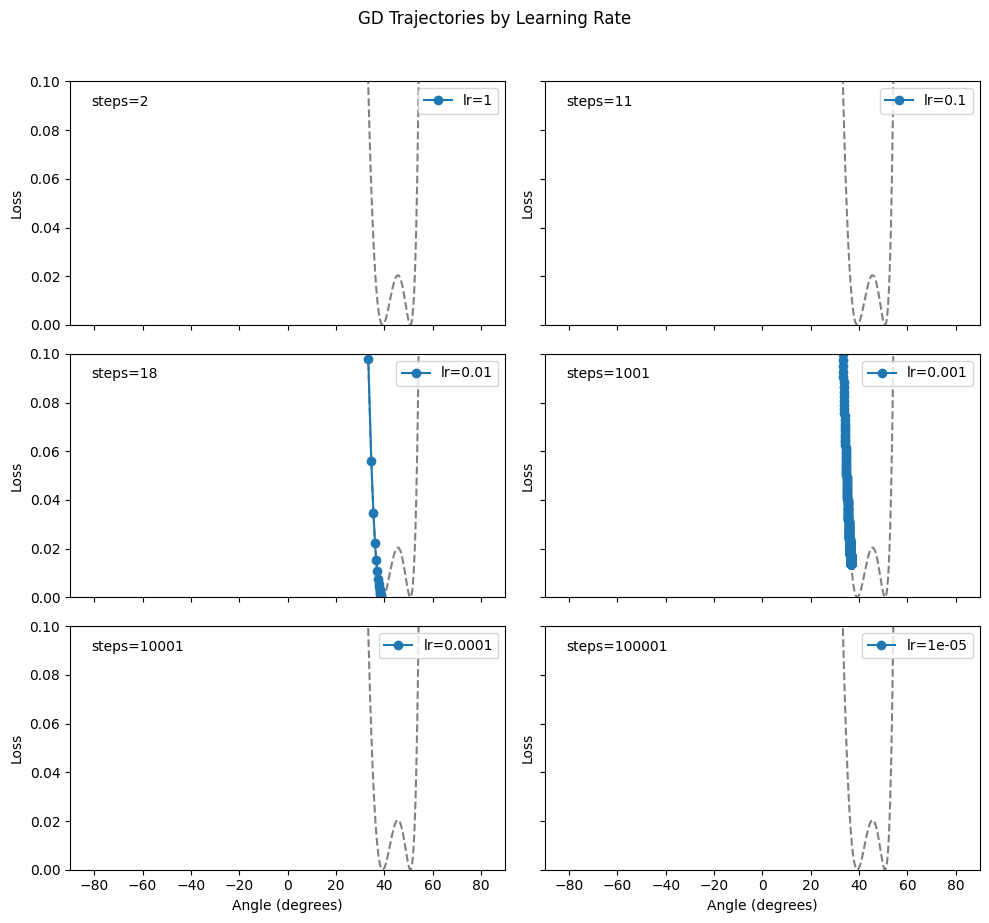

In [169]:
def plot_all_gds(lossfn, lrs, iterations, thresholds,
                          initial_theta=0, resolution=0.1, ylimit=(0, 0.1), gd_func=constant_descent):
    # 1) Compute histories
    histories = [
        gd_func(lr, iters, thr, initial_theta, use_threshold=True)
        for lr, iters, thr in zip(lrs, iterations, thresholds)
    ]

    # 2) Precompute loss surface
    grid_deg  = np.arange(-90, 90+resolution, resolution)
    grid_rad  = np.radians(grid_deg)
    grid_loss = [lossfn(t) for t in grid_rad]

    # 3) Make subplots with enough slots
    n = len(lrs)
    cols = 2
    rows = ceil(n/cols)
    fig, axes = plt.subplots(rows, cols,
                             sharex=True, sharey=True,
                             figsize=(10, 3*rows))
    axes_flat = axes.ravel()

    # 4) Plot each run
    for ax, lr, hist in zip(axes_flat, lrs, histories):
        ax.plot(grid_deg, grid_loss, '--', color='gray')
        ax.plot(np.degrees(hist),
                [lossfn(t) for t in hist],
                'o-',
                label=f"lr={lr}")
        ax.set_xlim(-90,90)
        ax.set_ylim(*ylimit)
        ax.set_ylabel("Loss")
        ax.legend(loc='upper right')
        ax.text(0.05, 0.9, f"steps={len(hist)}", transform=ax.transAxes)
        ax.grid(False)

    # 5) Clean up any extra subplots (if n is odd)
    for extra_ax in axes_flat[n:]:
        extra_ax.set_visible(False)

    # 6) Shared labels & layout
    for ax in axes_flat[-cols:]:
        ax.set_xlabel("Angle (degrees)")
    fig.suptitle("GD Trajectories by Learning Rate", y=1.02)
    plt.tight_layout()
    plt.show()
		
plot_all_gds(
	lossfn=LOSS_FUNCTION,
	lrs=[1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
	iterations=[1, 10, 100, 1000, 10000, 100000],
	thresholds=[0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
	initial_theta=0,
	gd_func=gradient_descent_with_decay
)